In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# base_dir = Path("/home/yizi/decode-brain-wide-map/results")
base_dir = Path("./results")

In [3]:
regions = {
    "cerebellum": {"DEC": {}, "SIM": {}, "ANcr1": {}},
    "hippocampus": {"CA1": {}, "CA2": {}, "CA3": {}},
    "visual": {"VISa": {}, "VISp": {}, "LGd": {}},
    "motor": {"GRN": {}, "MOp": {}, "MOs": {}}
}

In [100]:
from scipy.linalg import svd

for region in regions:
    for sub_roi in regions[region]:
        eids = os.listdir(base_dir/sub_roi)
        for eid in eids:
            if not eid.endswith(".ipynb_checkpoints"):
                path = base_dir/sub_roi/eid
                res = np.load(
                        path/"stimOn_times_-0.5_1.5_0.05_all_units.npy", allow_pickle=True
                    ).item()[eid]["UV"]
                U, V = res
                W = U @ V.T
                svd_U, S, svd_V = svd(W)
                regions[region][sub_roi].update(
                    {eid: (np.diag(S[:2]) @ svd_V[:2, :]).T}
                )

In [8]:
%matplotlib inline
plt.rc("figure", dpi=200)
SMALL_SIZE = 8
BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.5)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10

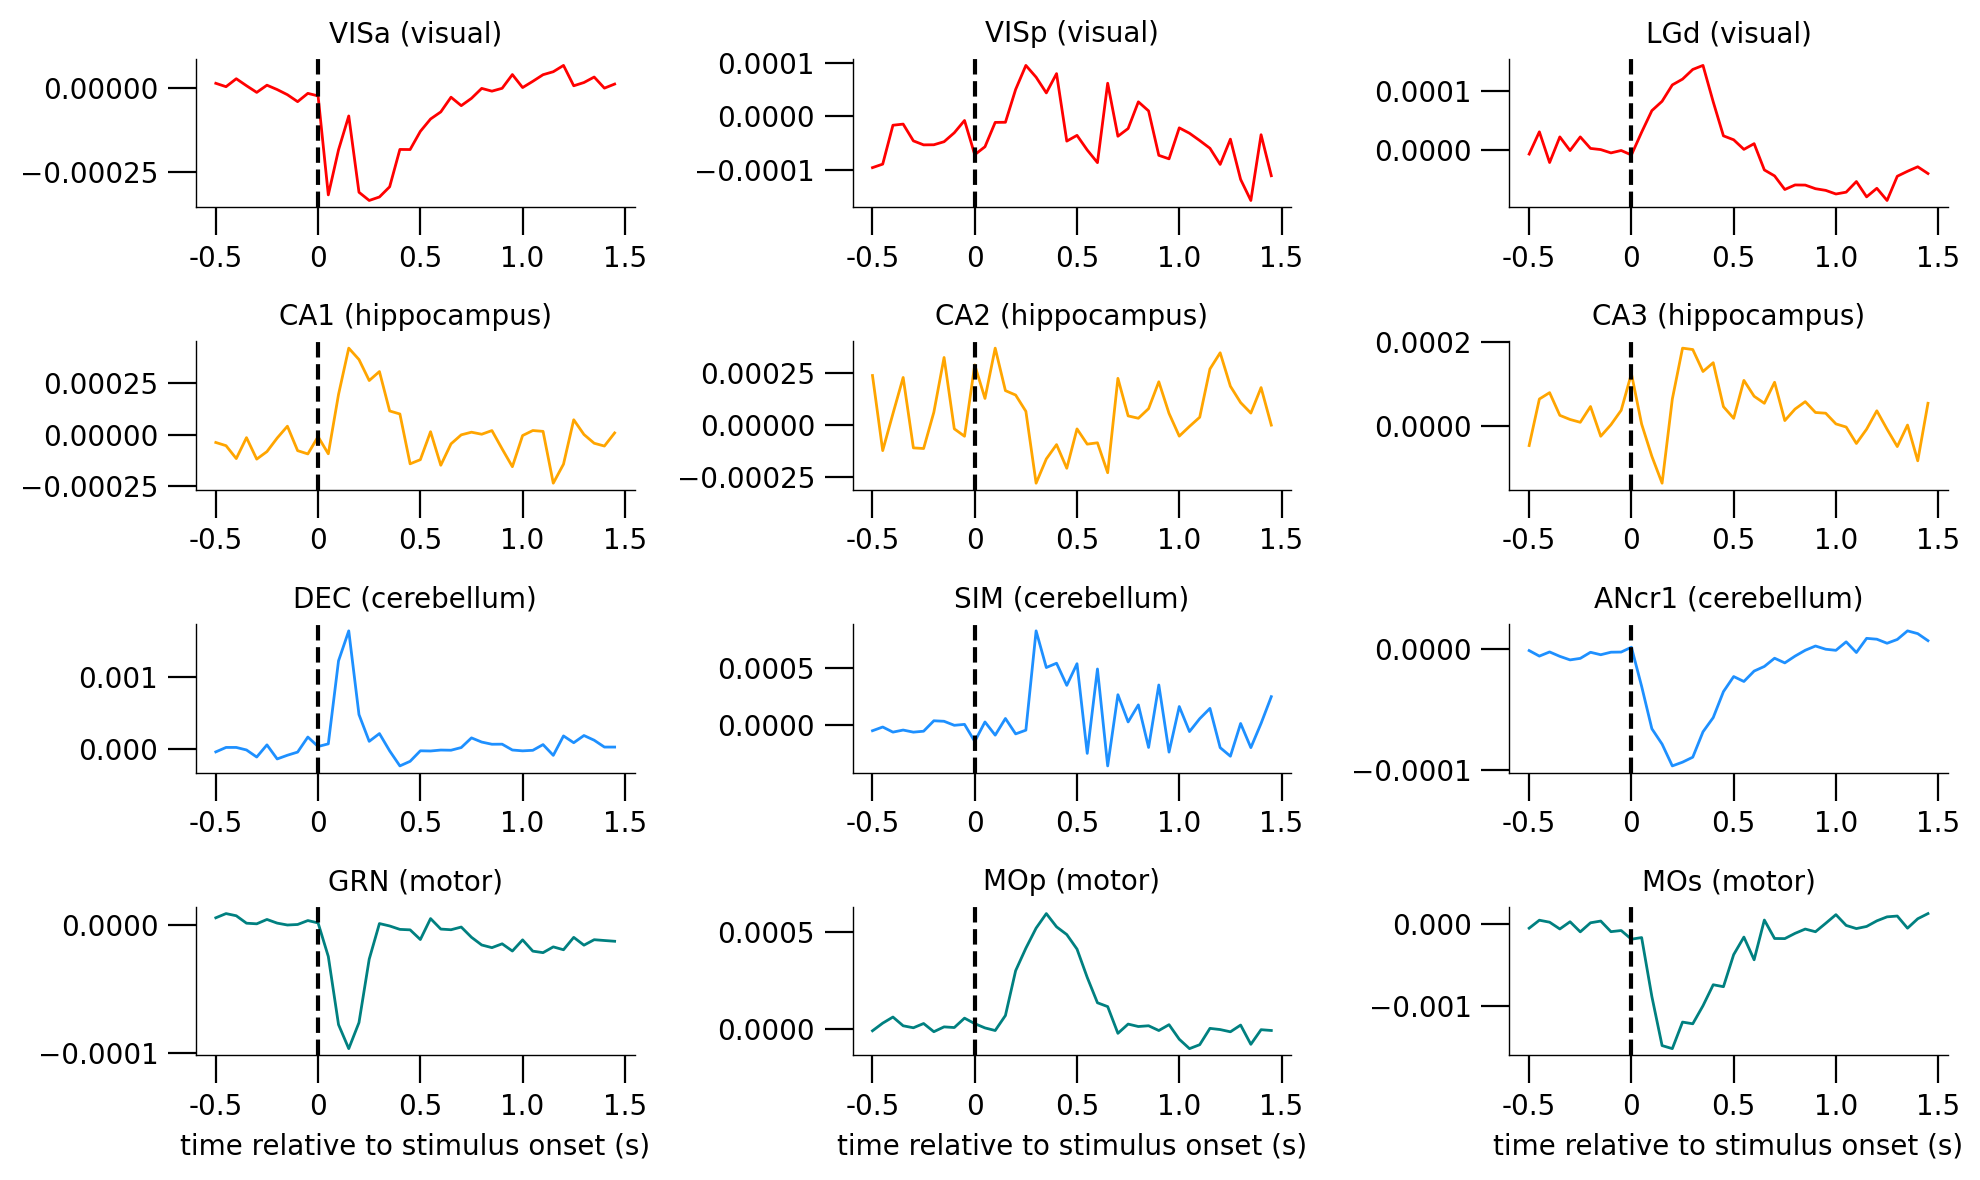

In [108]:
from matplotlib.ticker import FormatStrFormatter

colors = ["red", "orange", "dodgerblue", "teal"]

fig, axes = plt.subplots(4, 3, figsize=(10, 6))
for region in regions: 
    if region == "visual":
        i = 0
    elif region == "hippocampus":
        i = 1
    elif region == "cerebellum":
        i = 2
    else:
        i = 3
    for j, sub_roi in enumerate(regions[region]):
        res = np.array(list(regions[region][sub_roi].values())).mean(0)
        axes[i,j].plot(res.T[0], c=colors[i], linewidth=1.)
        axes[i,j].axvline(10, color="k", linestyle="--")
        axes[i,j].set_title(f"{sub_roi} ({region})")
        axes[i,j].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
        if i == 3:
            axes[i,j].set_xlabel("time relative to stimulus onset (s)")
        axes[i,j].spines[['right', 'top']].set_visible(False)
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.savefig("brainwide_timescales.png", dpi=200)
plt.show()

In [12]:
regions = {
    "cerebellum": {"DEC": {}, "SIM": {}, "ANcr1": {}},
    "hippocampus": {"CA1": {}, "CA2": {}, "CA3": {}},
    "visual": {"VISa": {}, "VISp": {}, "LGd": {}},
    "motor": {"GRN": {}, "MOp": {}, "MOs": {}}
}

In [14]:
for region in regions:
    for sub_roi in regions[region]:
        svd_V = np.load(base_dir/f"{sub_roi}_timescale.npy", allow_pickle=True)
        timescale = np.abs(np.array(svd_V[0])).mean(0).T
        regions[region][sub_roi].update({"V": timescale})

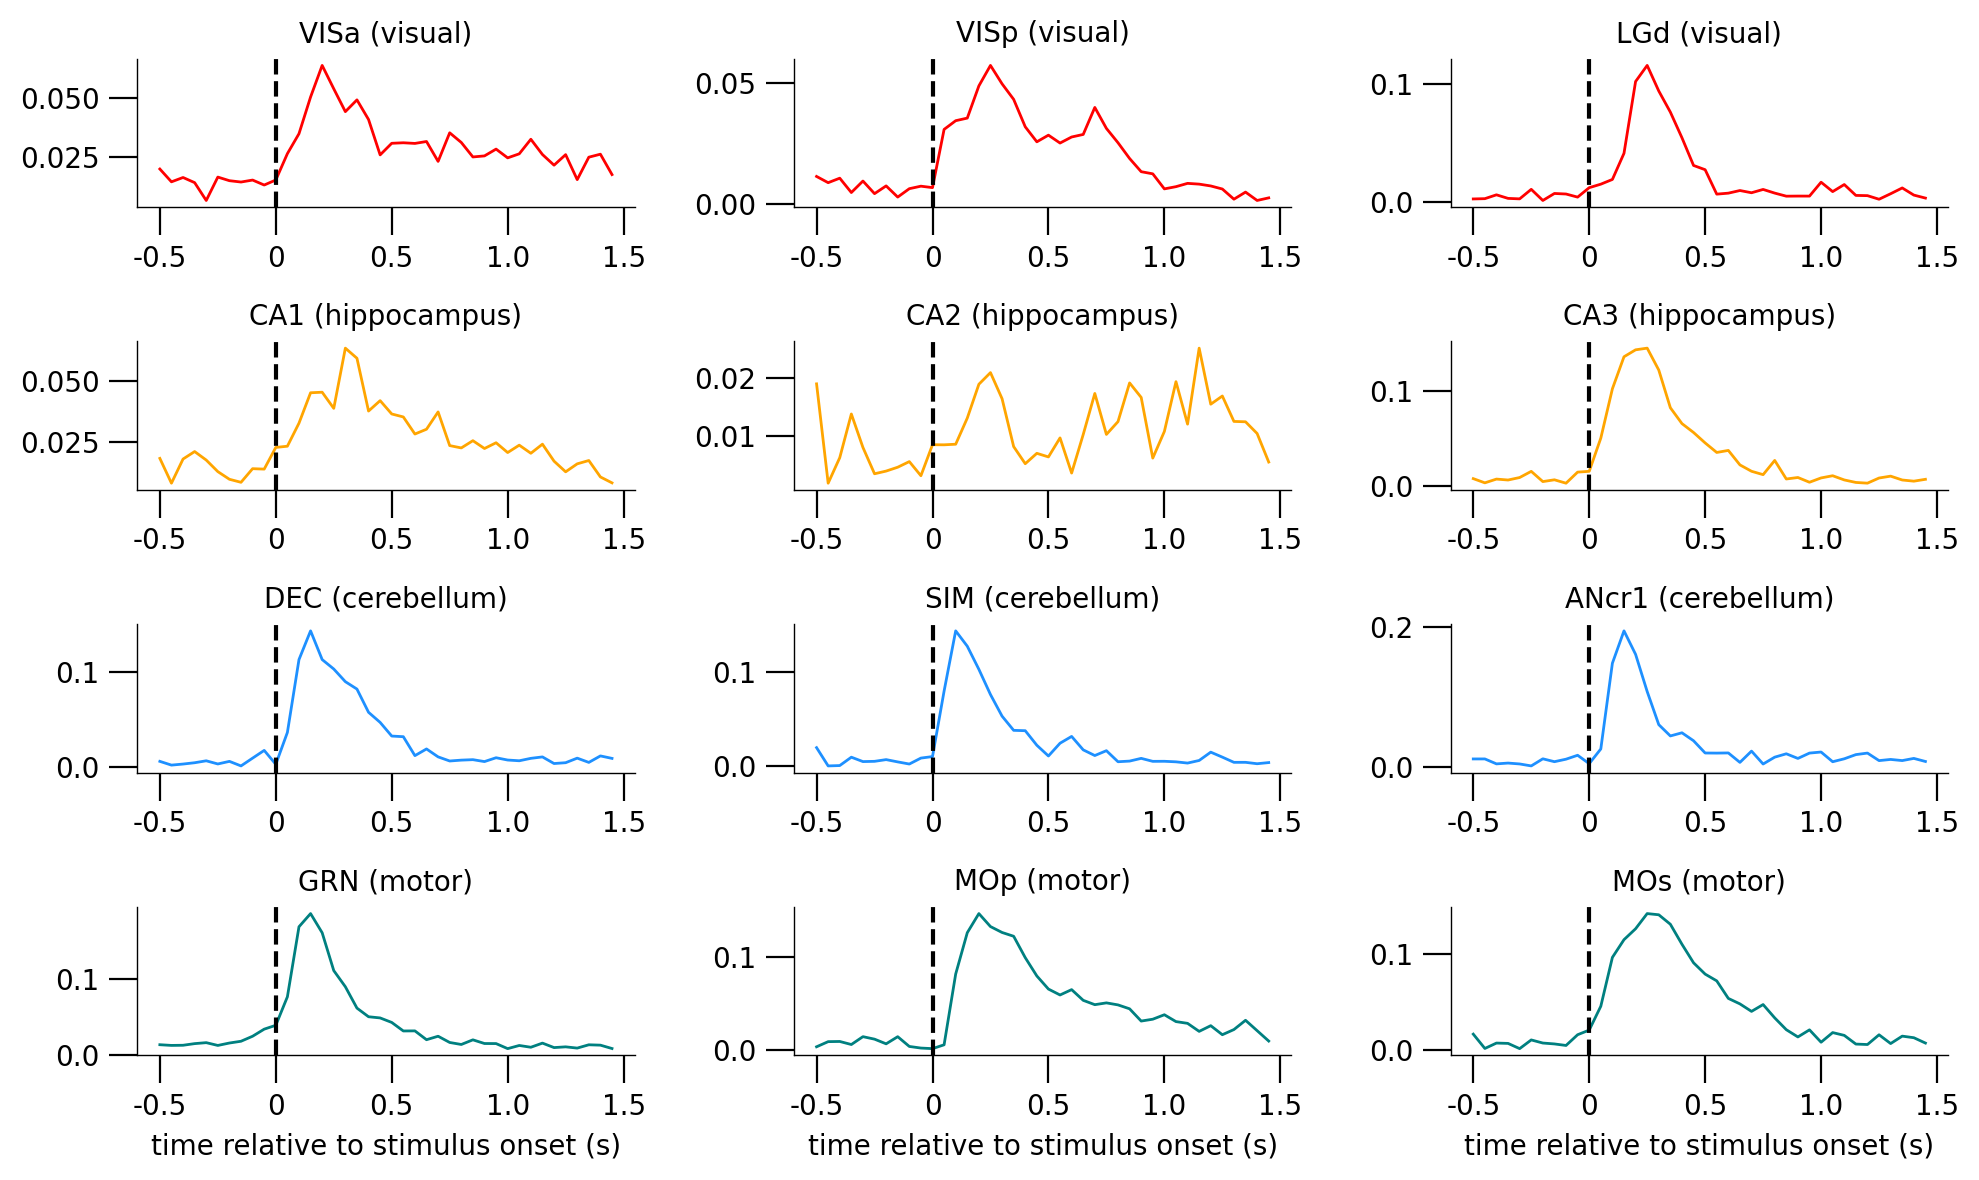

In [17]:
from matplotlib.ticker import FormatStrFormatter

colors = ["red", "orange", "dodgerblue", "teal"]

fig, axes = plt.subplots(4, 3, figsize=(10, 6))
for region in regions: 
    if region == "visual":
        i = 0
    elif region == "hippocampus":
        i = 1
    elif region == "cerebellum":
        i = 2
    else:
        i = 3
    for j, sub_roi in enumerate(regions[region]):
        res = np.array(list(regions[region][sub_roi]["V"]))
        axes[i,j].plot(res.T[0], c=colors[i], linewidth=1.)
        axes[i,j].axvline(10, color="k", linestyle="--")
        axes[i,j].set_title(f"{sub_roi} ({region})")
        axes[i,j].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
        if i == 3:
            axes[i,j].set_xlabel("time relative to stimulus onset (s)")
        axes[i,j].spines[['right', 'top']].set_visible(False)
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.savefig("brainwide_timescales_anchored.png", dpi=200)
plt.show()

In [4]:
regions = {
    "STR": {"CP": {}, "LSr": {}, "APr": {}},
    "PAL": {"GPe": {}},
    "TH": {"PO": {}, "LP":{}, "LGd": {}, "LGv": {}, "VAL": {}},
    "CTX": {"FRP": {}, "MOp": {}, "MOs": {}, "ORBvl": {}, "Alv": {}},
    "CB": {"DEC": {}, "SIM": {}, "ANcr1": {}, "COPY": {}, "PYR": {}},
    "P": {"NI": {}, "PB": {}},
    "MB": {"PAG": {}, "SNr": {}},
    "MD": {"IRN": {}, "SPIV": {}, "LIN": {}, "MDRN": {}},
    "HPF": {"CA1": {}, "CA2": {}, "CA3": {}},
    "HY": {"STN": {}},
    "other": {"GRN": {}, "VISa": {}, "VISp": {}}
}

In [15]:
n_rois = 0
for region in regions:
    for sub_roi in regions[region]:
        n_rois += 1
        svd_V = np.load(base_dir/f"{sub_roi}_timescale.npy", allow_pickle=True)
        timescale = np.abs(np.array(svd_V[0])).mean(0).T
        regions[region][sub_roi].update({"V": timescale})

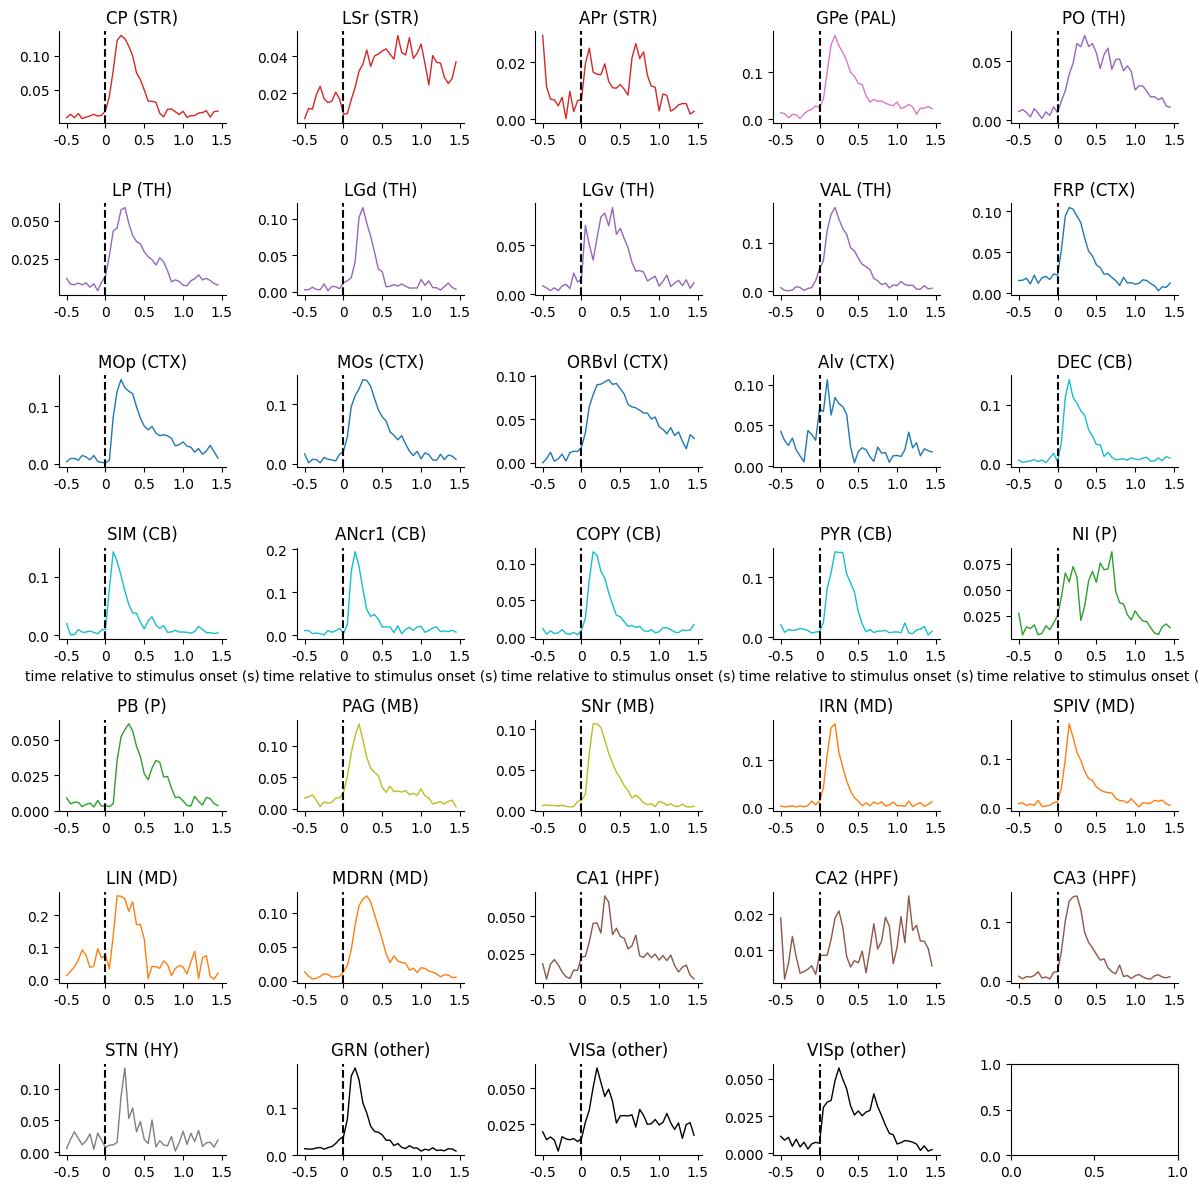

In [87]:
from matplotlib.ticker import FormatStrFormatter

colors = ["tab:red", "tab:pink", "tab:purple", "tab:blue", "tab:cyan", "tab:green",
         "tab:olive", "tab:orange", "tab:brown", "tab:gray", "k"]

fig, axes = plt.subplots(7, 5, figsize=(12, 12))

i, j, ctn = 0, 0, 0
for region in regions: 
    for sub_roi in regions[region]:
        if (j + 1) % 6 == 0:
            i += 1
            j = 0
        res = np.array(list(regions[region][sub_roi]["V"]))
        axes[i,j].plot(res.T[0], color=colors[ctn], linewidth=1.)
        axes[i,j].axvline(10, color="k", linestyle="--")
        axes[i,j].set_title(f"{sub_roi} ({region})")
        axes[i,j].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
        if i == 3:
            axes[i,j].set_xlabel("time relative to stimulus onset (s)")
        axes[i,j].spines[['right', 'top']].set_visible(False)
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        j += 1
    ctn += 1
plt.tight_layout()
plt.savefig("brainwide_timescales_more.png", dpi=200)
plt.show()

In [3]:
regions = {
    "STR": {"CP": {}, "LSr": {}, "APr": {}},
    "PAL": {"GPe": {}},
    "TH": {"PO": {}, "LP":{}, "LGv": {}, "VAL": {}},
    "CTX": {"FRP": {}, "ORBvl": {}, "Alv": {}},
    "CB": {"COPY": {}, "PYR": {}},
    "P": {"NI": {}, "PB": {}},
    "MB": {"PAG": {}, "SNr": {}},
    "MD": {"IRN": {}, "SPIV": {}, "LIN": {}, "MDRN": {}},
    # "HPF": {"CA3": {}},
    "HY": {"STN": {}},
    # "other": {"VISp": {}}
}

In [62]:
n_rois = 0
for region in regions:
    for sub_roi in regions[region]:
        n_rois += 1
        svd_V = np.load(base_dir/f"{sub_roi}_timescale.npy", allow_pickle=True).item()
        timescale = np.abs(np.array(svd_V["all"])).mean(0)[0]
        regions[region][sub_roi].update({"all": timescale})
        for level in [1, 0.25, 0.125, 0.0625]:
            timescale = np.abs(np.array(svd_V[-level])).mean(0)[0]
            regions[region][sub_roi].update({-level: timescale})
            timescale = np.abs(np.array(svd_V[level])).mean(0)[0]
            regions[region][sub_roi].update({level: timescale})

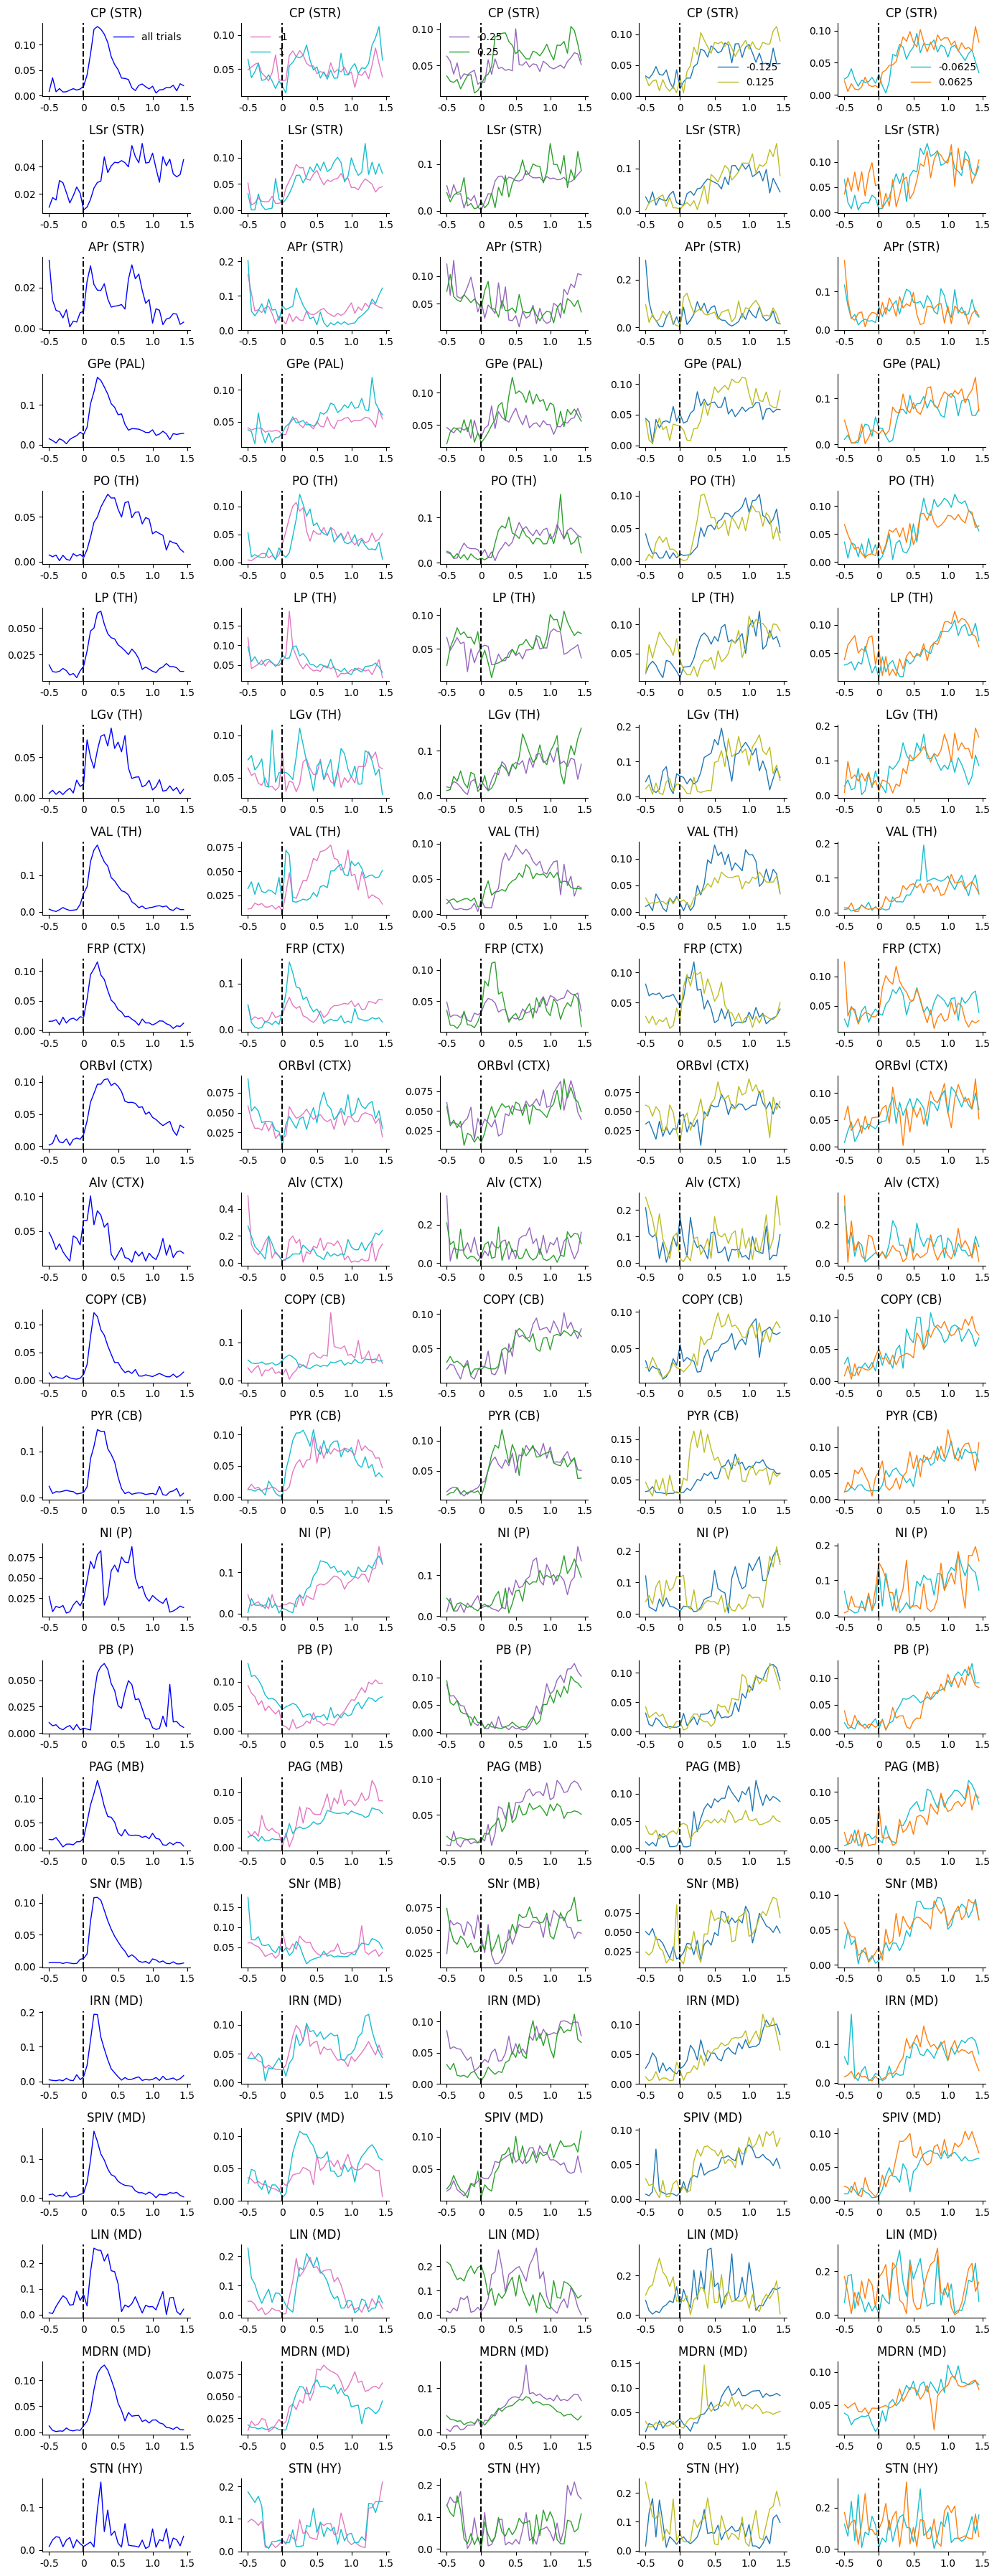

In [82]:
from matplotlib.ticker import FormatStrFormatter

colors = ["tab:red", "tab:pink", "tab:purple", "tab:blue", "tab:cyan", "tab:green",
         "tab:olive", "tab:orange"]


fig, axes = plt.subplots(22, 5, figsize=(14, 36))

i = 0
for region in regions: 
    for sub_roi in regions[region]:
        res = np.array(list(regions[region][sub_roi]["all"]))
        axes[i,0].plot(res, color="b", linewidth=1., label="all trials")
        axes[i,0].axvline(10, color="k", linestyle="--")
        axes[i,0].set_title(f"{sub_roi} ({region})")
        axes[i,0].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
        axes[i,0].spines[['right', 'top']].set_visible(False)
        if i == 0:
            axes[0,0].legend(frameon=False, fontsize=10)
        for j, level in enumerate([1, 0.25, 0.125, 0.0625]):
            j += 1
            try:
                res = np.array(list(regions[region][sub_roi][-level]))
                axes[i,j].plot(res, color=colors[j], linewidth=1., label=-level)
            except:
                pass
            
            try:
                res = np.array(list(regions[region][sub_roi][level]))
                axes[i,j].plot(res, color=colors[j+3], linewidth=1., label=level)
            except:
                pass 
            axes[i,j].axvline(10, color="k", linestyle="--")
            axes[i,j].set_title(f"{sub_roi} ({region})")
            axes[i,j].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
            axes[i,j].spines[['right', 'top']].set_visible(False)
            if i == 0:
                # axes[i,j].set_xlabel("time relative to stimulus onset (s)")
                axes[0,j].legend(frameon=False, ncol=1, fontsize=10)
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        i += 1
# plt.savefig("brainwide_timescales_more.png", dpi=200)
plt.tight_layout()
plt.show()

In [4]:
n_rois = 0
for region in regions:
    for sub_roi in regions[region]:
        n_rois += 1
        svd_V = np.load(base_dir/f"{sub_roi}_timescale.npy", allow_pickle=True).item()
        timescale = np.abs(np.array(svd_V["all"])).mean(0)[0]
        regions[region][sub_roi].update({"all": timescale})
        for level in [1, 0.25, 0.125, 0.0625]:
            timescale = np.abs(np.array(svd_V[level])).mean(0)[0]
            regions[region][sub_roi].update({level: timescale})

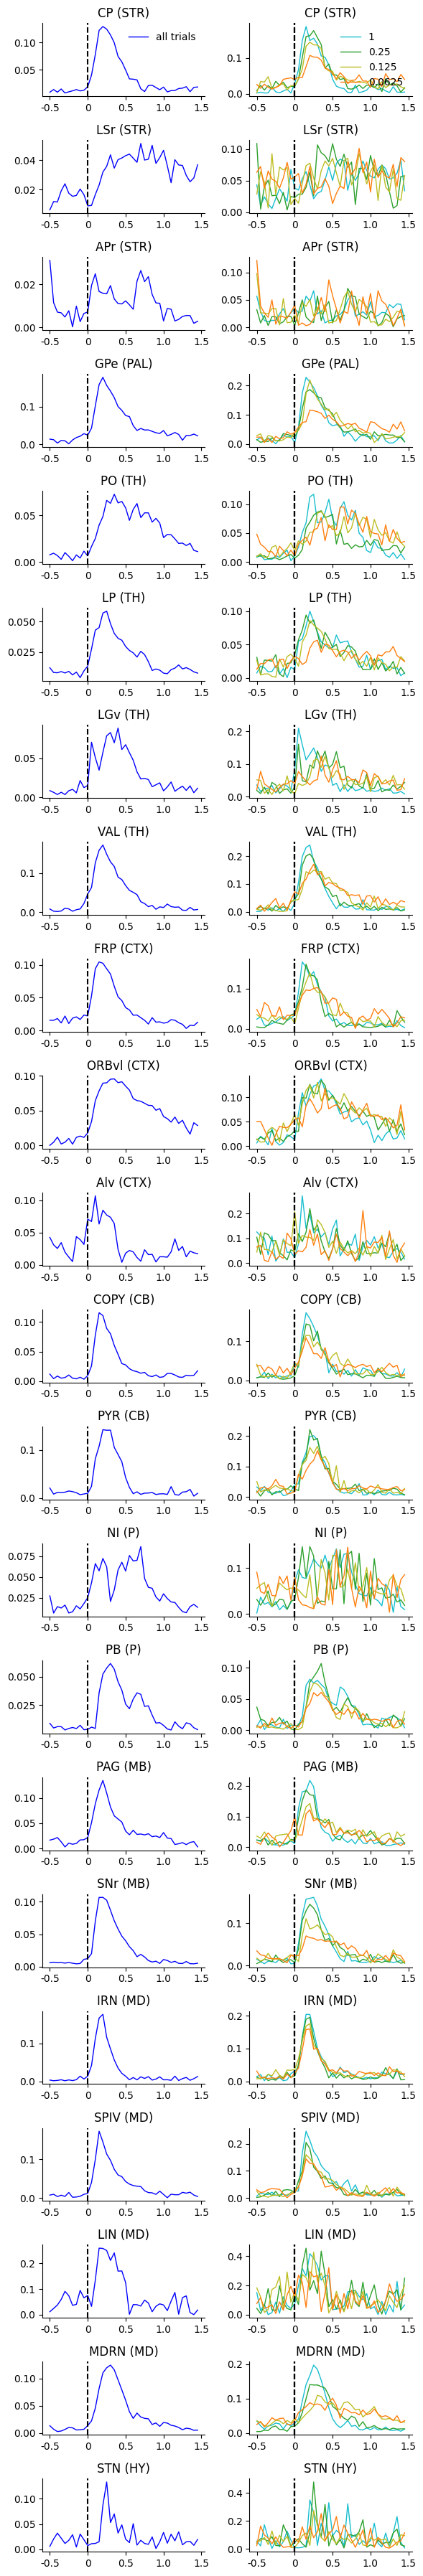

In [5]:
from matplotlib.ticker import FormatStrFormatter

colors = ["tab:red", "tab:pink", "tab:purple", "tab:blue", "tab:cyan", "tab:green",
         "tab:olive", "tab:orange"]


fig, axes = plt.subplots(22, 2, figsize=(6, 36))

i = 0
for region in regions: 
    for sub_roi in regions[region]:
        res = np.array(list(regions[region][sub_roi]["all"]))
        axes[i,0].plot(res, color="b", linewidth=1., label="all trials")
        axes[i,0].axvline(10, color="k", linestyle="--")
        axes[i,0].set_title(f"{sub_roi} ({region})")
        axes[i,0].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
        axes[i,0].spines[['right', 'top']].set_visible(False)
        if i == 0:
            axes[0,0].legend(frameon=False, fontsize=10)
        for j, level in enumerate([1, 0.25, 0.125, 0.0625]):
            j += 1            
            try:
                res = np.array(list(regions[region][sub_roi][level]))
                axes[i,1].plot(res, color=colors[j+3], linewidth=1., label=level)
            except:
                pass 
            axes[i,1].axvline(10, color="k", linestyle="--")
            axes[i,1].set_title(f"{sub_roi} ({region})")
            axes[i,1].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
            axes[i,1].spines[['right', 'top']].set_visible(False)
            if i == 0:
                # axes[i,j].set_xlabel("time relative to stimulus onset (s)")
                axes[0,1].legend(frameon=False, ncol=1, fontsize=10)
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        i += 1
# plt.savefig("brainwide_timescales_more.png", dpi=200)
plt.tight_layout()
plt.show()